# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
  * [3.5 Correlations in the Data](#3.5_Correlations_in_the_Data)
  * [3.6 Plot the Data by Column](#3.6_Plot_the_Data_by_Column)
      * [3.6.1 loan_amnt, annual_inc, int_rate, installment](#3.6.1_loan_amnt,_annual_inc,_int_rate,_installment)
      * [3.6.2 loan_stat](#3.6.2_loan_stat)
      * [3.6.3 verification_status, emp_length, addr_state, purpose](#3.6.3_verification_status,_emp_length,_addr_state,_purpose)
      * [3.6.4 grade, sub_grade, term(months), home_ownership](#3.6.4_grade,_sub_grade,_term(months),_home_ownership)
      * [3.6.5 dti, tot_coll_amt](#3.6.5_dti,_tot_coll_amt)
      * [3.6.6 acc_now_delinq, delinq_2yrs](#3.6.6_acc_now_delinq,_delinq_2yrs)
      * [3.6.7 inq_last_6mths, pub_rec](#3.6.7_inq_last_6mths,_pub_rec)
      * [3.6.8 collections_12_mths_ex_med](#3.6.8_collections_12_mths_ex_med)
      * [3.6.9 open_acc, total_acc](#3.6.9_open_acc,_total_acc)
      * [3.6.10 revol_bal](#3.6.10_revol_bal)
      * [3.6.11 total_rev_hi_lim, revol_util](#3.6.11_total_rev_hi_lim,_revol_util)
      * [3.6.12 last_credit_pull_d, earliest_cr_line](#3.6.12_last_credit_pull_d,_earliest_cr_line)
      * [3.6.13 mths_since_last_delinq, mths_since_last_record, mths_since_last_major_derog](#3.6.13_mths_since_last_delinq,_mths_since_last_record,_mths_since_last_major_derog)
  * [3.7 Summary](#3.7_Summary)

## 3.2 Introduction<a id='3.2_Introduction'></a>

In this notebook, I am going to start looking at the relationships between the columns in the data while keeping in mind that the final goal is to be able to predict whether a loan will default.

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

In [2]:
lc = pd.read_csv('../data/LC_cleaned.csv', index_col='id')
lc.head()

,loan_amnt,term(months),int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,total_rev_hi_lim,defaults
id,,,,,,,,,,,,,,,,,,,,,
10149342,27050.0,36,10.99,885.46,B,B2,10.0,OWN,55000.0,Verified,...,36638.0,61.2,27.0,Dec-2015,0.0,300.0,0.0,0.0,59900.0,0
10159584,9750.0,36,13.98,333.14,C,C1,1.0,RENT,26000.0,Not Verified,...,7967.0,52.8,28.0,Jan-2016,0.0,300.0,0.0,0.0,15100.0,0
10159498,12000.0,36,6.62,368.45,A,A2,10.0,MORTGAGE,105000.0,Not Verified,...,13168.0,21.6,22.0,Jan-2016,0.0,300.0,0.0,0.0,61100.0,0
10139658,12000.0,36,13.53,407.40,B,B5,10.0,RENT,40000.0,Source Verified,...,5572.0,68.8,32.0,Jan-2016,0.0,53.0,0.0,15386.0,8100.0,0
10159548,15000.0,36,8.90,476.30,A,A5,2.0,MORTGAGE,63000.0,Not Verified,...,11431.0,74.2,29.0,Jan-2016,0.0,34.0,0.0,1514.0,15400.0,0


In [3]:
lc.columns

Index(['loan_amnt', 'term(months)', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'total_rev_hi_lim', 'defaults'],
      dtype='object')

In [4]:
# setting some formatting for graphs
plt.style.use('bmh')
sns.set_style('whitegrid')

## 3.5 Correlations in the Data<a id='3.5_Correlations_in_the_Data'></a>

Now I am going to look into which columns correlate with eachother. Any columns that are too highly correlated, I will want to remove as the dataset contains 43 columns.  

In [5]:
# creating a dataframe of the continuous variable columns
non_object_columns = lc.select_dtypes(exclude=['object']).columns
non_object = lc[[x for x in non_object_columns]]

In [6]:
# calculate the correlations
correlations = non_object.corr()

In [7]:
# which columns are most correlated with defaults?
correlations['defaults'].sort_values()

annual_inc                    -0.042227
total_rev_hi_lim              -0.034068
revol_bal                     -0.017314
pub_rec                       -0.013943
total_acc                     -0.011771
open_acc                      -0.011363
emp_length                    -0.009119
collections_12_mths_ex_med    -0.007797
delinq_2yrs                   -0.004806
tot_coll_amt                  -0.001924
acc_now_delinq                -0.001040
loan_amnt                      0.000185
mths_since_last_major_derog    0.009921
installment                    0.012684
mths_since_last_delinq         0.013187
mths_since_last_record         0.015955
dti                            0.022406
term(months)                   0.024385
revol_util                     0.040831
inq_last_6mths                 0.067397
int_rate                       0.155231
defaults                       1.000000
Name: defaults, dtype: float64

 The highest correlations to defaults are - int_rate and inq_last_6mths 

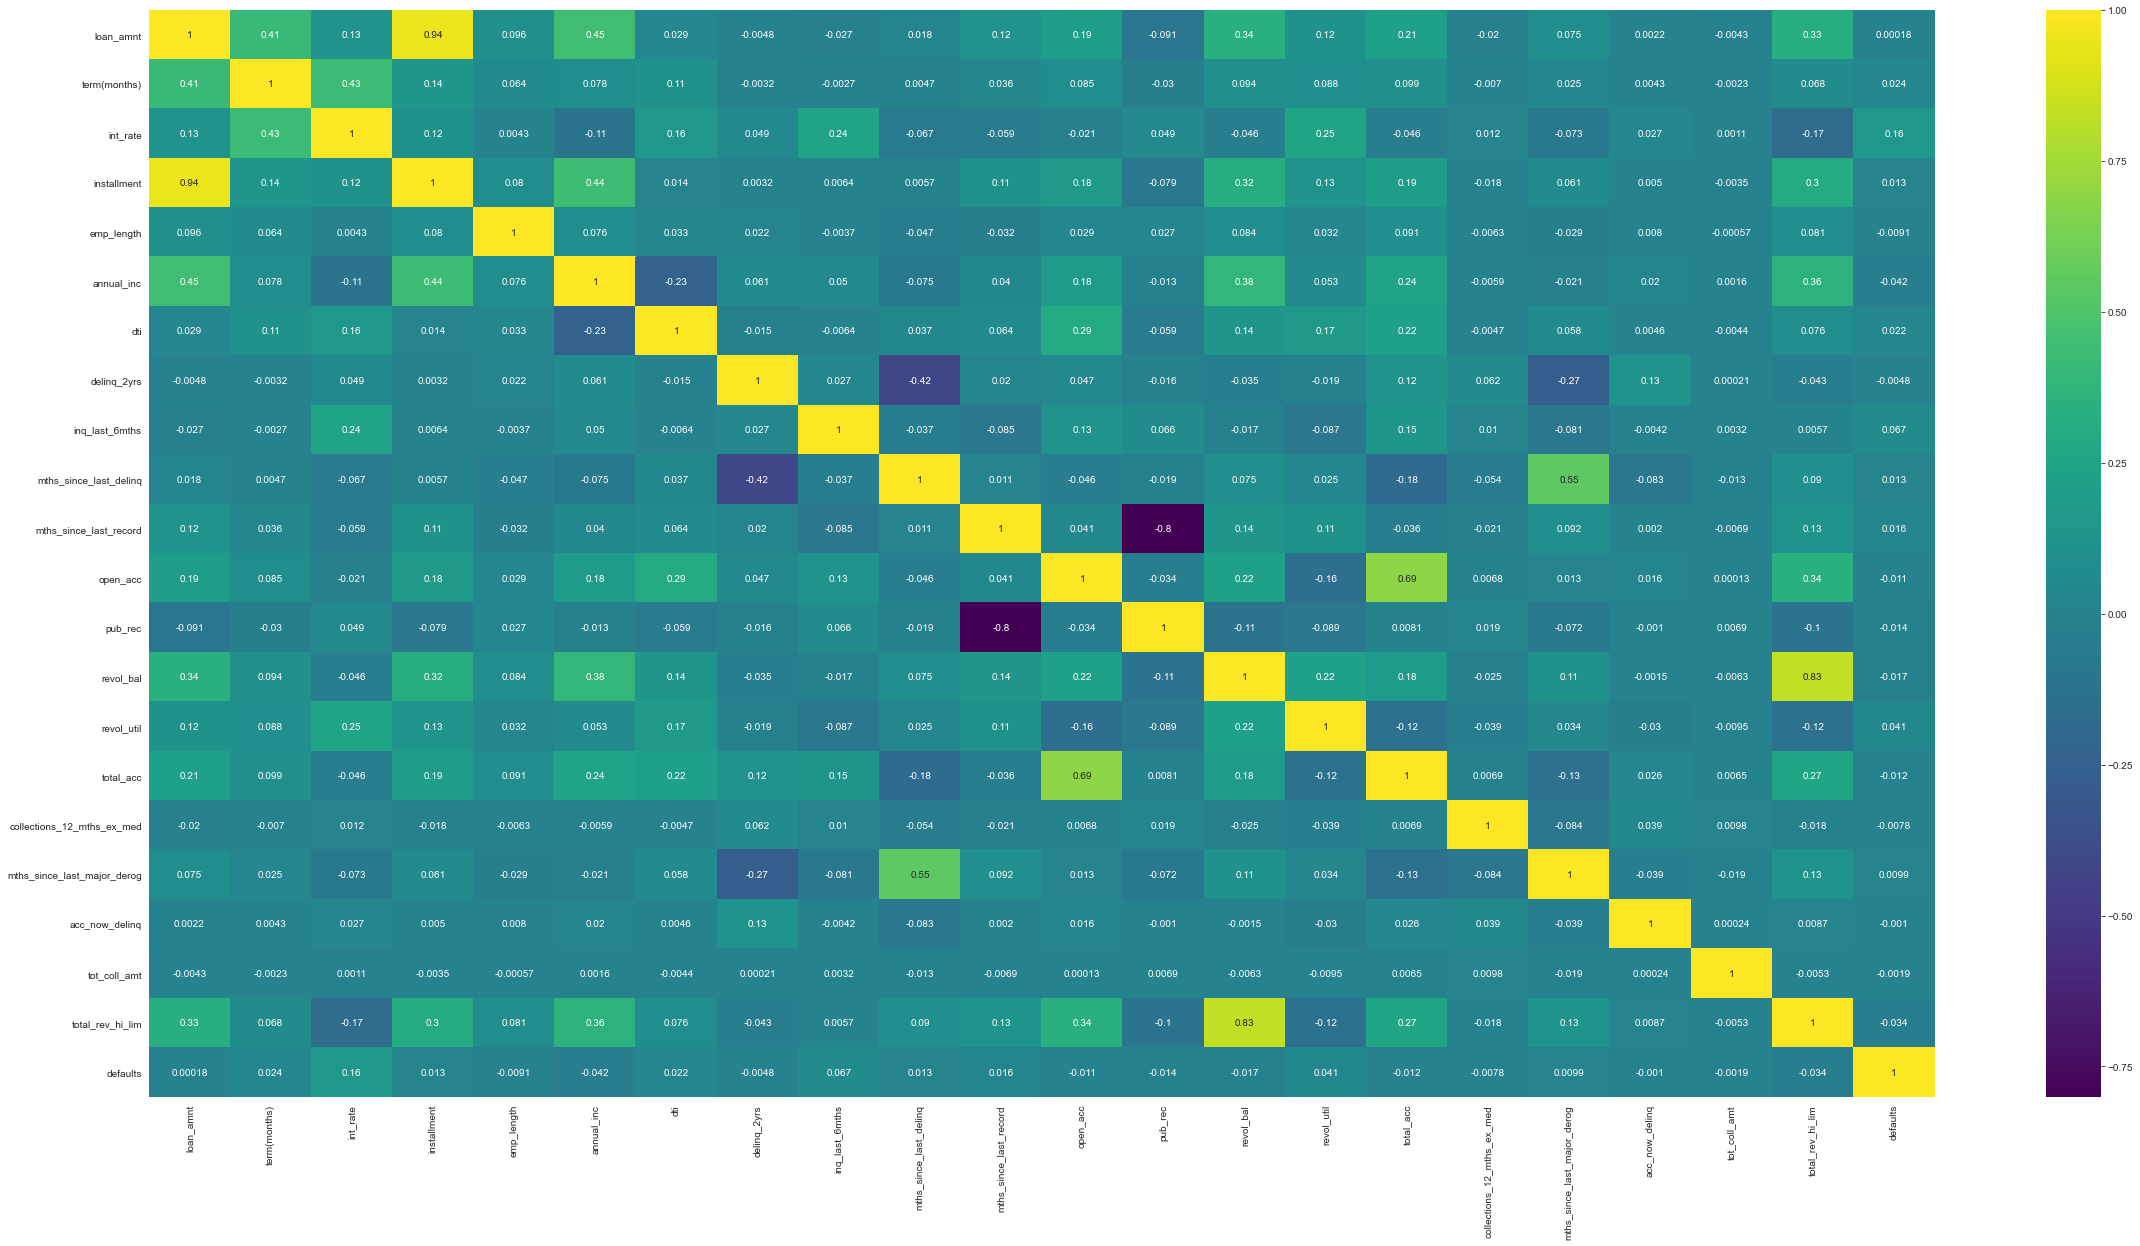

In [8]:
# create a heatmap of the continuous variables 
plt.figure(figsize=(40,20))
sns.heatmap(non_object.corr(), annot=True, cmap='viridis')
plt.show()

Looking at the heatmap, can we get rid of the installment column since it is so highly correlated with loan_amnt?

revol_util and total_rev_hi_lim are very highly correlated. Do both columns need to be kept?

It looks like pub_rec and mths_since_last_record are very highly correlated. Can one of these columns be dropped?

## 3.6 Plot the Data by Column<a id='3.6_Plot_the_Data_by_Column'></a>

### 3.6.1 loan_amnt, annual_inc, int_rate, installment<a id='3.6.1_loan_amnt,_annual_inc,_int_rate,_installment'></a>

Text(0.5, 0, 'installment')

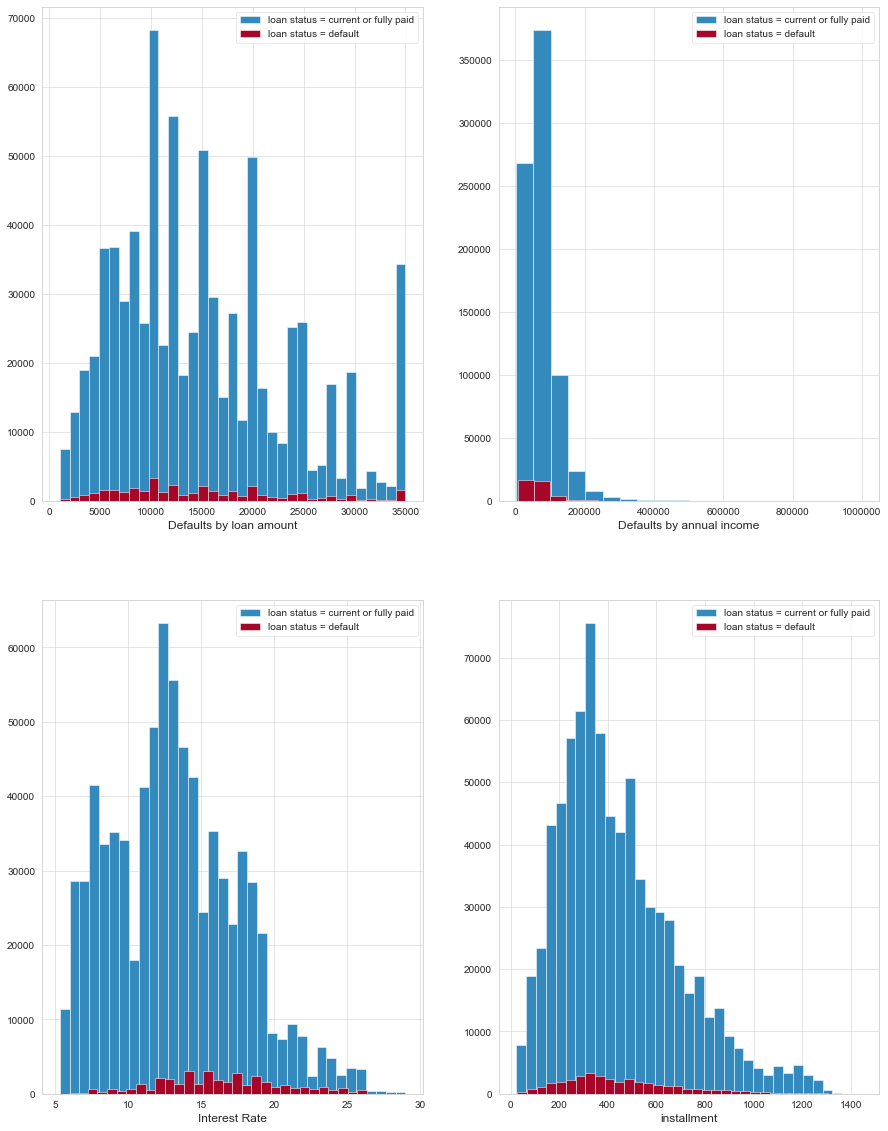

In [10]:
plt.figure(figsize=(15, 20))

plt.subplot(2, 2, 1)
lc[lc['defaults'] == 0]['loan_amnt'].hist(bins=35, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['loan_amnt'].hist(bins=35, label='loan status = default')
plt.legend()
plt.xlabel('Defaults by loan amount')

plt.subplot(2, 2, 2)
lc[lc['defaults'] == 0]['annual_inc'].hist(bins=20, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['annual_inc'].hist(bins=20, label='loan status = default')
plt.legend()
plt.xlabel('Defaults by annual income')
plt.ticklabel_format(useOffset=False, style='plain')

plt.subplot(2, 2, 3)
lc[lc['defaults'] == 0]["int_rate"].hist(bins=35, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]["int_rate"].hist(bins=35, label='loan status = default')
plt.legend()
plt.xlabel("Interest Rate")

plt.subplot(2, 2, 4)
lc[lc['defaults'] == 0]["installment"].hist(bins=35, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]["installment"].hist(bins=35, label='loan status = default')
plt.legend()
plt.xlabel("installment")

Text(0.5, 1.0, 'Relationship between loan amount and installment')

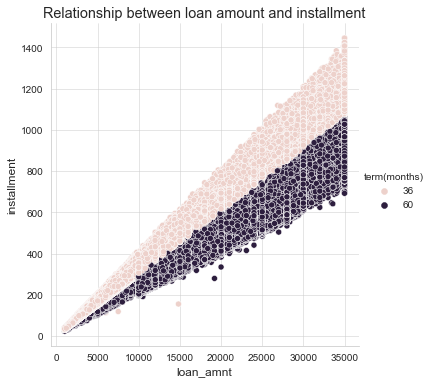

In [11]:
sns.relplot(x='loan_amnt', y='installment', hue='term(months)', data=lc)
plt.title('Relationship between loan amount and installment')

Looking at the above graph, there is a very clear relationship between loan_amnt, installment, and the loan term. 

Looking at the graphs above, it is hard to tell whether loan amount or annual income impacts whether a loan will default. Since the data is not normally distributed, I will use the Kruskal-Wallis H-test which tests the null hypothesis that the population median of all of the groups are equal.

In [12]:
# looking at Kruskal-Wallis statistic
# null-hypothesis: loan_amnt does not impact on the default rate

sample_default = lc[lc['defaults']==1]['loan_amnt']
sample_nondefault = lc[lc['defaults']==0]['loan_amnt']

stats.kruskal(sample_default, sample_nondefault)

KruskalResult(statistic=0.31146601073024605, pvalue=0.5767819728675387)

In [13]:
# looking at Kruskal-Wallis statistic
# null-hypothesis: annual_inc does not impact on the default rate

annual_inc_default = lc[lc['defaults']==1]['annual_inc']
annual_inc_nondefault = lc[lc['defaults']==0]['annual_inc']

stats.kruskal(annual_inc_default, annual_inc_nondefault)

KruskalResult(statistic=2139.5686074614637, pvalue=0.0)

Given the two p-values above, I reject the null-hypotheses that loan_amnt and annual_inc do not impact whether or not a loan will default.

### 3.6.2 loan_stat<a id='3.6.2_loan_stat'></a>

Text(0.5, 1.0, 'Loan Status')

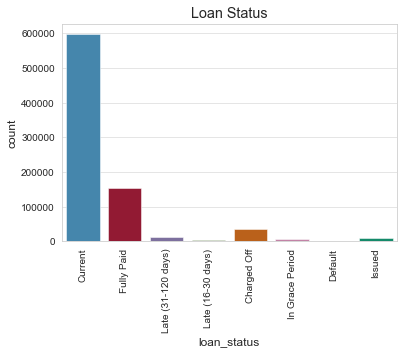

In [14]:
loan_stat = sns.countplot(x='loan_status', data=lc)
loan_stat.set_xticklabels(loan_stat.get_xticklabels(), rotation=90)
plt.title('Loan Status')

The loan_status column was used to create the defaults column ('default' and 'charged off' were both set to default). I do not feel the need to keep this column any longer. I will now drop loan_status.

In [15]:
lc.drop(['loan_status'], axis=1, inplace=True)
lc.shape

(816877, 30)

### 3.6.3 verification_status, emp_length, addr_state, purpose<a id='3.6.3_verification_status,_emp_length,_addr_state,_purpose'></a>

In [18]:
lc['emp_length'].fillna(0, inplace=True)

Text(0.5, 1.0, 'Defaults by purpose')

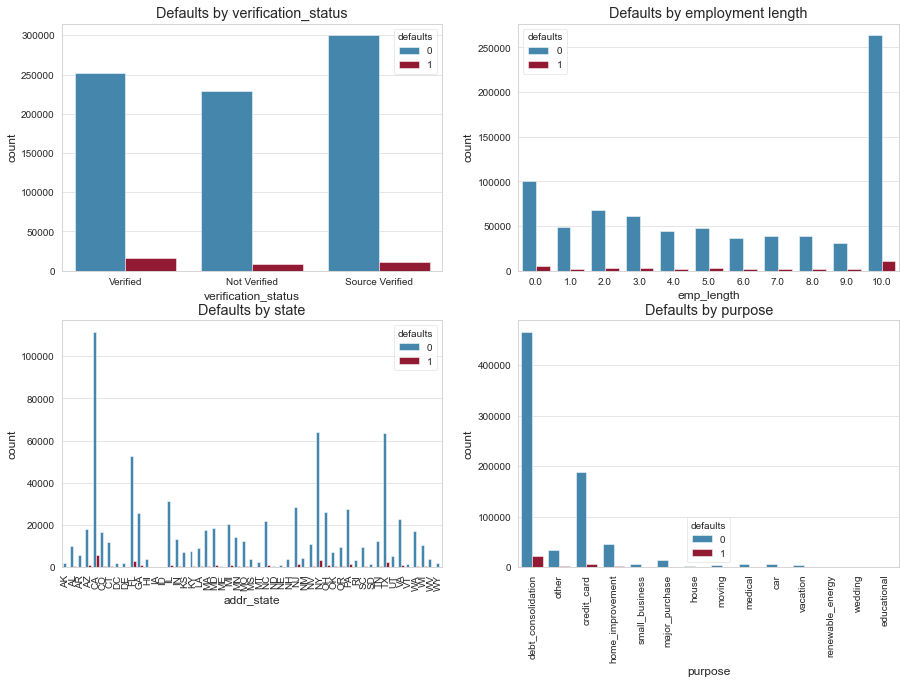

In [19]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='verification_status', data=lc, hue='defaults')
plt.title('Defaults by verification_status')

plt.subplot(2, 2, 2)
length = sorted(lc.emp_length.unique().tolist())
sns.countplot(x='emp_length', data=lc, hue='defaults', order=length)
plt.title('Defaults by employment length')

plt.subplot(2, 2, 3)
state_name = sorted(lc.addr_state.unique().tolist())
state = sns.countplot(x='addr_state', data=lc, hue='defaults', order=state_name)
state.set_xticklabels(state.get_xticklabels(), rotation=90)
plt.title('Defaults by state')

plt.subplot(2, 2, 4) 
purpose = sns.countplot(x='purpose', data=lc, hue='defaults')
purpose.set_xticklabels(purpose.get_xticklabels(), rotation=90)
plt.title('Defaults by purpose')

Here I am going to take a closer look at the percentage of defaults per unique value in each of these columns. I will start by writing a function to do these calculations. 

In [20]:
# here I am defining a function that calculates the percentage of defaults for each unique value in a column
def percent_defaults(col):
    values = list(lc[col].unique())
    value_count = dict(lc[col].value_counts())
    default_percent = list()
    for i in range(len(values)):
        key = values[i]
        default_percent.append(lc[lc[col] == key]['defaults'].sum()/value_count[key]*100)
    return dict(zip(values, default_percent))

In [21]:
# define a function that returns the range of percentages from a column
def range_perc(col):
    dictionary = percent_defaults(col)
    key_max = max(dictionary.keys(), key=(lambda k: dictionary[k]))
    key_min = min(dictionary.keys(), key=(lambda k: dictionary[k]))
    return dictionary[key_max] - dictionary[key_min]

In [22]:
print('The range of percentages for the purpose column is: ', str(range_perc('purpose')))
print('The range of percentages for the addr_state column is: ', str(range_perc('addr_state')))
print('The range of percentages for the emp_length column is: ', str(range_perc('emp_length')))
print('The range of percentages for the verification_status column is: ', str(range_perc('verification_status')))

The range of percentages for the purpose column is:  13.013698630136986
The range of percentages for the addr_state column is:  50.0
The range of percentages for the emp_length column is:  1.5525616645054399
The range of percentages for the verification_status column is:  2.221105267471988


Here I would like to take a look at whether the percentages of defaults in employment length are significant since the range is fairly small at 4.66 - 6.47.

The null hypothesis that I would like to explore is that the number of defaults is actually evenly distributed among the different employment lengths. Since emp_length is a categorical variable, I will use the chisquare test from scipy stats. 

In [23]:
# Here I am going to separate out the lists of observed vs expected values and calculate the critical value 
tot_default_perc = lc['defaults'].sum()/len(lc)*100
emp_length_perc = percent_defaults('emp_length')
df_emp_length = pd.DataFrame(emp_length_perc, index=['percent']).T
observed = list(df_emp_length['percent'])
df_emp_length['expected'] = tot_default_perc
expected = list(df_emp_length['expected'])
critical_value = stats.chi2.ppf(q = 0.95, df=9)
critical_value

16.918977604620448

In [24]:
# now the calculate the chisquare
stats.chisquare(f_obs= observed, f_exp= expected)

Power_divergenceResult(statistic=0.5243806358807673, pvalue=0.9999916955150941)

Given that the chisquare statistic is not greater than the critical value and the p-value is 0.99, I cannot reject the null hypothesis. In this case, I am going to chose to drop the emp_length column.

In [25]:
# dropping emp_length column
lc.drop(['emp_length'], axis=1, inplace=True)

### 3.6.4 grade, sub_grade, term(months), home_ownership<a id='3.6.4_grade,_sub_grade,_term(months),_home_ownership'></a>

Text(0.5, 1.0, 'Defaults by home type')

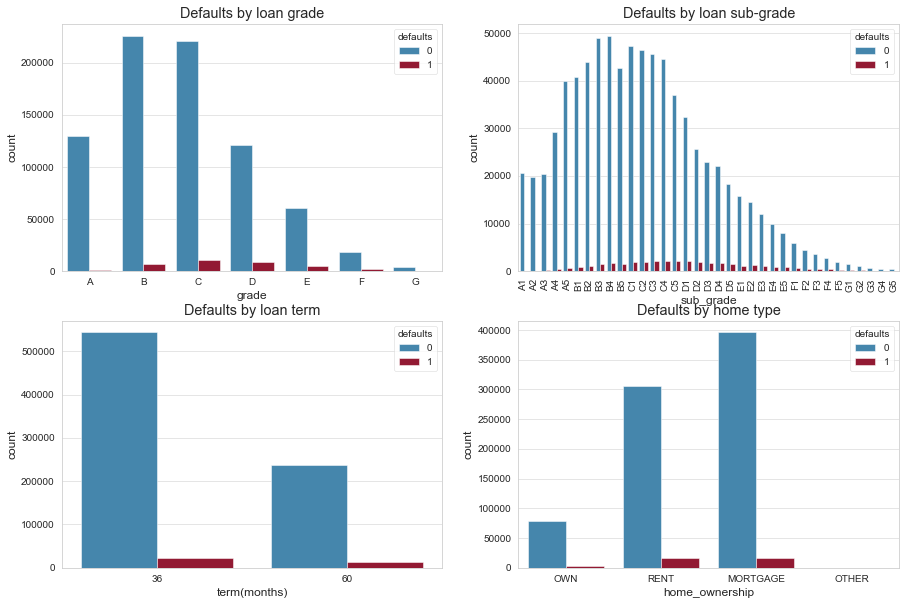

In [27]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(lc.grade.unique().tolist())
sns.countplot(x='grade', data=lc, hue='defaults', order=grade)
plt.title('Defaults by loan grade')

plt.subplot(2, 2, 2)
sub_grade = sorted(lc.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=lc, hue='defaults', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.title('Defaults by loan sub-grade')

plt.subplot(2, 2, 3)
sns.countplot(x='term(months)', data=lc, hue='defaults')
plt.title('Defaults by loan term')

plt.subplot(2, 2, 4)
sns.countplot(x='home_ownership', data=lc, hue='defaults')
plt.title('Defaults by home type')

In [28]:
range_perc('grade')

12.393518909595354

In [29]:
range_perc('sub_grade')

14.95531280631862

In [30]:
range_perc('term(months)')

1.0921032482525117

In [31]:
range_perc('home_ownership')

12.723735219768754

In [32]:
# Here I am going to separate out the lists of observed vs expected values for the percentages in term(months) and 
# calculate the critical value 
tot_default_perc = lc['defaults'].sum()/len(lc)*100
term_perc = percent_defaults('term(months)')
df_term = pd.DataFrame(term_perc, index=['percent']).T
observed = list(df_term['percent'])
df_term['expected'] = tot_default_perc
expected = list(df_term['expected'])
critical_value = stats.chi2.ppf(q = 0.95, df=(len(df_term)-1))
critical_value

3.841458820694124

In [33]:
# now the calculate the chisquare
stats.chisquare(f_obs= observed, f_exp= expected)

Power_divergenceResult(statistic=0.15386921216532118, pvalue=0.6948648869467939)

Given that the chisquare statistic is not greater than the critical value and the p-value is 0.65, I cannot reject the null hypothesis. In this case, I am going to chose to drop the term(months) column.

Also, since grade is a more general sub_grade, I am going to drop the grade column.

In [34]:
# dropping term(months) and grade columns
lc.drop(['term(months)', 'grade'], axis=1, inplace=True)
lc.shape

(816877, 27)

### 3.6.5 dti, tot_coll_amt<a id='3.6.5_dti,_tot_coll_amt'></a>

Text(0.5, 1.0, 'Defaults by tot_coll_amt')

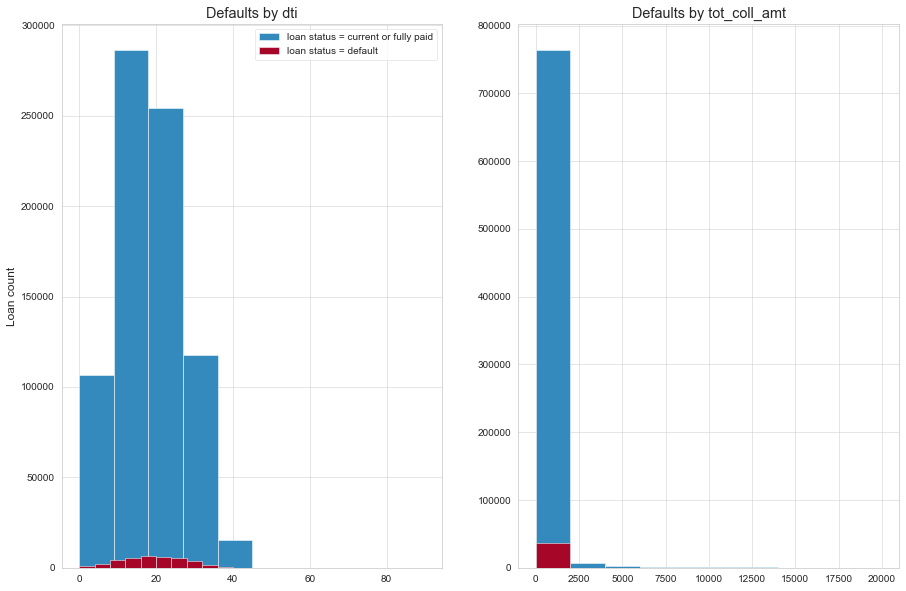

In [39]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
lc[lc['defaults'] == 0]['dti'].hist(bins=10, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['dti'].hist(bins=10, label='loan status = default')
plt.legend()
plt.ylabel('Loan count')
plt.title('Defaults by dti')

plt.subplot(1,2,2)
tca = lc[lc.tot_coll_amt < 20000]
tca[tca["defaults"] == 0]['tot_coll_amt'].hist(label='loan status = current or fully paid')
tca[tca["defaults"] == 1]['tot_coll_amt'].hist(label='loan status = default')
plt.title('Defaults by tot_coll_amt')

### 3.6.6 acc_now_delinq, delinq_2yrs<a id='3.6.6_acc_now_delinq,_delinq_2yrs'></a>

In [40]:
acc_now_delinq_perc = percent_defaults('acc_now_delinq')
df_acc_now_delinq = pd.DataFrame(acc_now_delinq_perc, index=['percentage'])
df_acc_now_delinq = df_acc_now_delinq.T

In [41]:
delinq_2yrs_perc = percent_defaults('delinq_2yrs')
df_delinq_2yrs = pd.DataFrame(delinq_2yrs_perc, index=['percentage']).T

Text(0.5, 1.0, 'Percentage of 30+ day delinquencies that defaulted')

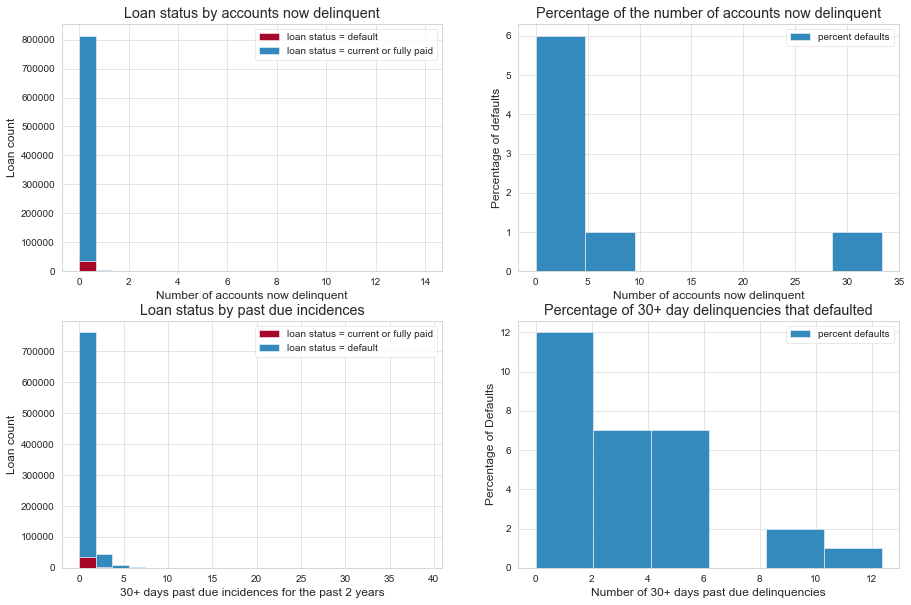

In [42]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
sns.histplot(data=lc, x='acc_now_delinq', stat='count', hue='defaults', multiple='stack', alpha=1)
plt.legend(['loan status = default', 'loan status = current or fully paid'], loc='upper right')
plt.title('Loan status by accounts now delinquent')
plt.xlabel('Number of accounts now delinquent')
plt.ylabel('Loan count')

plt.subplot(2,2,2)
sns.histplot(data=df_acc_now_delinq, label='percent defaults', color='darkred', alpha=1)
plt.legend(loc='upper right')
plt.xlabel('Number of accounts now delinquent')
plt.ylabel('Percentage of defaults')
plt.title('Percentage of the number of accounts now delinquent')

plt.subplot(2,2,3)
sns.histplot(data=lc, x='delinq_2yrs', stat='count', hue='defaults', multiple='stack', alpha=1)
plt.title('Loan status by past due incidences')
plt.ylabel('Loan count')
plt.xlabel('30+ days past due incidences for the past 2 years')
plt.legend(['loan status = current or fully paid', 'loan status = default'], loc='upper right')

plt.subplot(2,2,4)
sns.histplot(data=df_delinq_2yrs, label='percent defaults', color='darkred', alpha=1)
plt.legend(loc='upper right')
plt.xlabel('Number of 30+ days past due delinquencies')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of 30+ day delinquencies that defaulted')

### 3.6.7 inq_last_6mths, pub_rec<a id='3.6.7_inq_last_6mths,_pub_rec'></a>

In [43]:
pub_rec_perc = percent_defaults('pub_rec')
df_pub_rec = pd.DataFrame(pub_rec_perc, index=['percentage']).T

In [44]:
inq_last_6mths_perc = percent_defaults('inq_last_6mths')
df_inq_last_6mths = pd.DataFrame(inq_last_6mths_perc, index=['percentage']).T

Text(0.5, 0, 'Percentage of derogatory public records that defaulted')

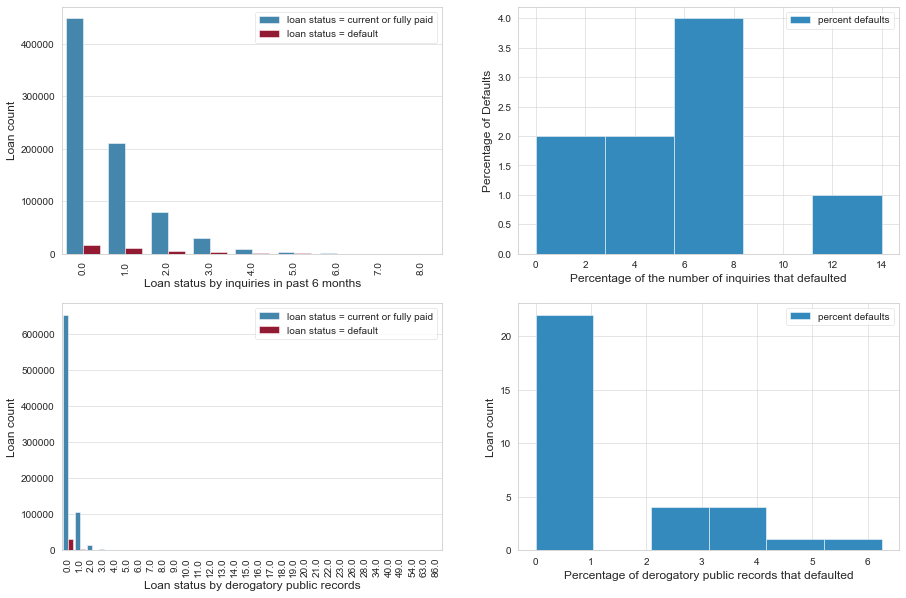

In [45]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
g = sns.countplot(x='inq_last_6mths', data=lc, hue='defaults')
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.legend(['loan status = current or fully paid', 'loan status = default'], loc='upper right')
plt.ylabel('Loan count')
plt.xlabel('Loan status by inquiries in past 6 months')

plt.subplot(2,2,2)
sns.histplot(data=df_inq_last_6mths, label='percent defaults', color='darkred', alpha=1)
plt.legend(loc='upper right')
plt.ylabel('Percentage of Defaults')
plt.xlabel('Percentage of the number of inquiries that defaulted')

plt.subplot(2,2,3)
p = sns.countplot(x='pub_rec', data=lc, hue='defaults')
p.set_xticklabels(p.get_xticklabels(), rotation=90);
plt.legend(['loan status = current or fully paid', 'loan status = default'], loc='upper right')
plt.ylabel('Loan count')
plt.xlabel('Loan status by derogatory public records')

plt.subplot(2,2,4)
sns.histplot(data=df_pub_rec, label='percent defaults', color='darkred', alpha=1)
plt.legend(loc='upper right')
plt.ylabel('Loan count')
plt.xlabel('Percentage of derogatory public records that defaulted')

### 3.6.8 collections_12_mths_ex_med<a id='3.6.8_collections_12_mths_ex_med'></a>

In [46]:
collections_12_mths_ex_med_perc = percent_defaults('collections_12_mths_ex_med')
df_collections_12_mths_ex_med = pd.DataFrame(collections_12_mths_ex_med_perc, index=['percentage']).T

Text(0.5, 1.0, 'Percentage of the number of collections that defaulted')

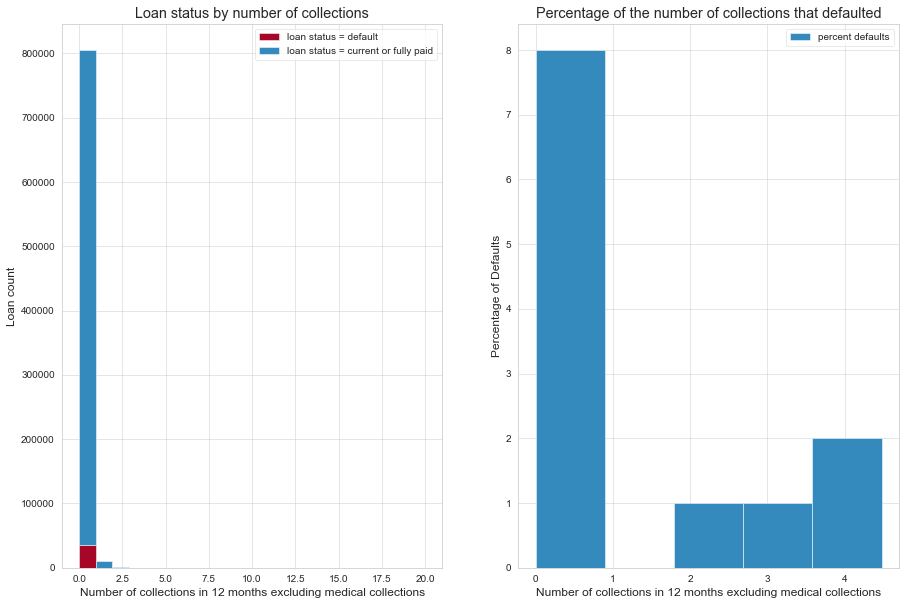

In [47]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
sns.histplot(data=lc, x='collections_12_mths_ex_med', stat='count', hue='defaults', multiple='stack', alpha=1)
plt.legend(['loan status = default', 'loan status = current or fully paid'], loc='upper right')
plt.title('Loan status by number of collections')
plt.xlabel('Number of collections in 12 months excluding medical collections')
plt.ylabel('Loan count')

plt.subplot(1,2,2)
sns.histplot(data=df_collections_12_mths_ex_med, label='percent defaults', color='darkred', alpha=1)
plt.legend(loc='upper right')
plt.xlabel('Number of collections in 12 months excluding medical collections')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of the number of collections that defaulted')

### 3.6.9 open_acc, total_acc<a id='3.6.9_open_acc,_total_acc'></a>

Text(0.5, 0, 'Number of defaults by total credit lines')

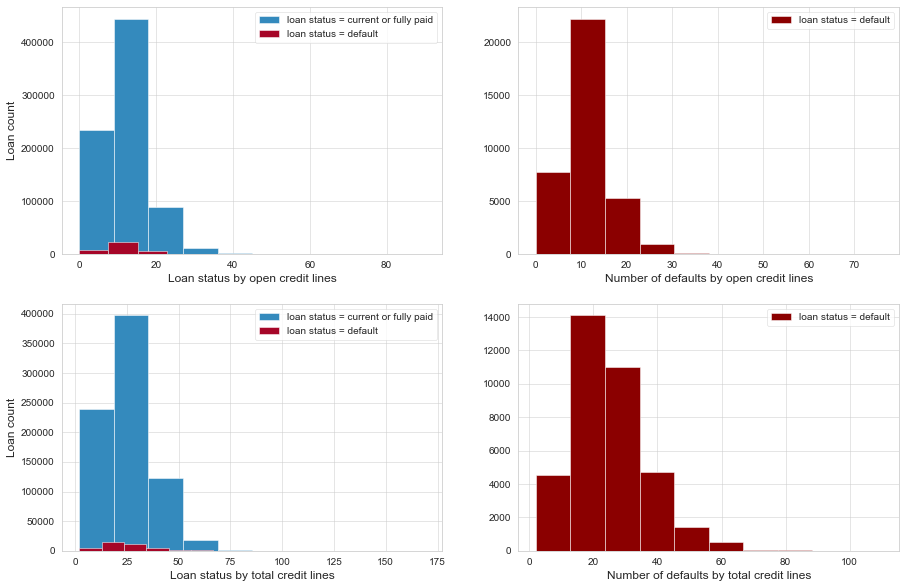

In [48]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
lc[lc["defaults"] == 0]['open_acc'].hist(label='loan status = current or fully paid')
lc[lc["defaults"] == 1]['open_acc'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Loan status by open credit lines')
plt.ylabel('Loan count')

plt.subplot(2,2,2)
lc[lc["defaults"] == 1]['open_acc'].hist(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Number of defaults by open credit lines')

plt.subplot(2,2,3)
lc[lc["defaults"] == 0]['total_acc'].hist(label='loan status = current or fully paid')
lc[lc["defaults"] == 1]['total_acc'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Loan status by total credit lines')
plt.ylabel('Loan count')

plt.subplot(2,2,4)
lc[lc["defaults"] == 1]['total_acc'].hist(label='loan status = default', color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Number of defaults by total credit lines')

The graphs of the defaults closely resemble the graphs of 'open_acc' and 'total_acc'. Let's take a closer look at the range of the default percentages.

In [49]:
range_perc('open_acc')

50.0

In [50]:
range_perc('total_acc')

25.0

As you can see, by the range of percentages, defaults are not evenly spread out across open_acc and total_acc.

### 3.6.10 revol_bal<a id='3.6.10_revol_bal'></a>

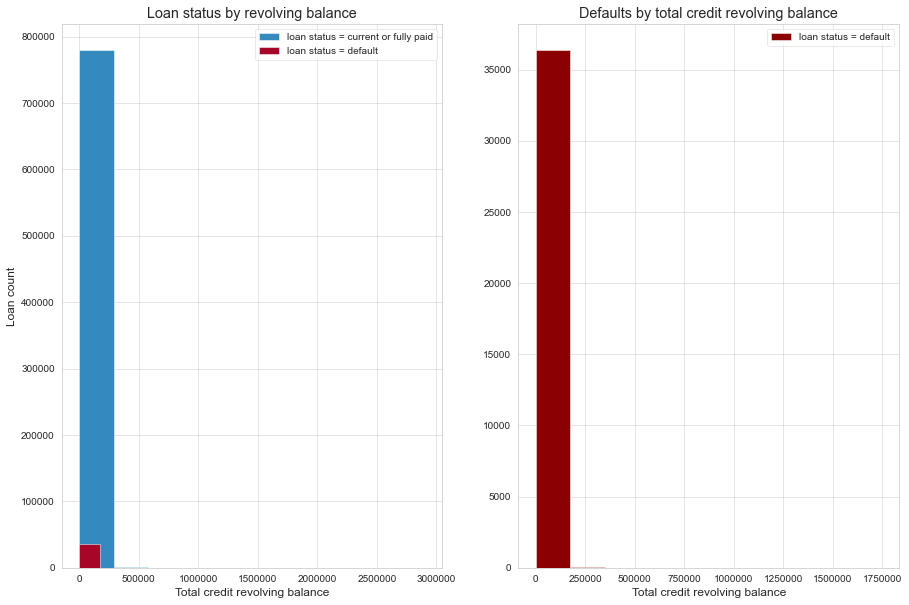

In [52]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
lc[lc['defaults'] == 0]['revol_bal'].hist(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['revol_bal'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Total credit revolving balance')
plt.ylabel('Loan count')
plt.title('Loan status by revolving balance')
plt.ticklabel_format(useOffset=False, style='plain')

plt.subplot(1,2,2)
lc[lc['defaults'] == 1]['revol_bal'].hist(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Total credit revolving balance')
plt.title('Defaults by total credit revolving balance')
plt.ticklabel_format(useOffset=False, style='plain')

In [53]:
lc['revol_bal'].describe()

count    8.168770e+05
mean     1.712661e+04
std      2.236781e+04
min      0.000000e+00
25%      6.591000e+03
50%      1.203700e+04
75%      2.107800e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

### 3.6.11 total_rev_hi_lim, revol_util<a id='3.6.11_total_rev_hi_lim,_revol_util'></a>

Text(0.5, 1.0, 'Number of defaults by revolving line utilization rate')

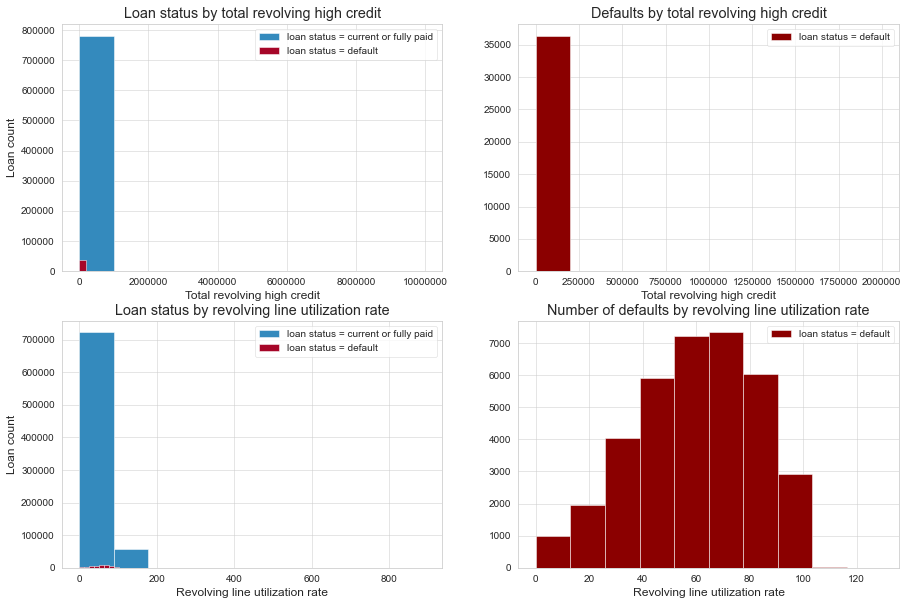

In [54]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
lc[lc['defaults'] == 0]['total_rev_hi_lim'].hist(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['total_rev_hi_lim'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Total revolving high credit')
plt.ylabel('Loan count')
plt.title('Loan status by total revolving high credit')
plt.ticklabel_format(useOffset=False, style='plain')

plt.subplot(2,2,2)
lc[lc['defaults'] == 1]['total_rev_hi_lim'].hist(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Total revolving high credit')
plt.title('Defaults by total revolving high credit')
plt.ticklabel_format(useOffset=False, style='plain')

plt.subplot(2,2,3)
lc[lc['defaults'] == 0]['revol_util'].hist(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['revol_util'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Revolving line utilization rate')
plt.ylabel('Loan count')
plt.title('Loan status by revolving line utilization rate')

plt.subplot(2,2,4)
lc[lc['defaults'] == 1]['revol_util'].hist(label='loan status = default', color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Revolving line utilization rate')
plt.title('Number of defaults by revolving line utilization rate')

In [55]:
lc.groupby(by='defaults')['total_rev_hi_lim'].describe()

,count,mean,std,min,25%,50%,75%,max
defaults,,,,,,,,
0,780454.0,32301.093834,36116.044051,0.0,14000.0,23900.0,40100.0,9999999.0
1,36423.0,26403.785740,25420.468461,0.0,12400.0,20500.0,33200.0,1998700.0


Text(0.5, 1.0, 'total revolving high credit boxplots')

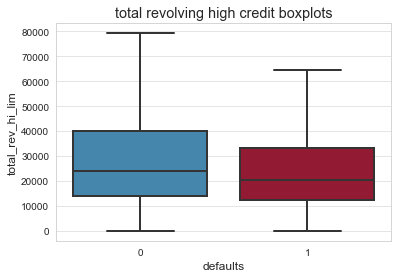

In [56]:
sns.boxplot(x='defaults', y='total_rev_hi_lim', data=lc, showfliers=False)
plt.title('total revolving high credit boxplots')

### 3.6.12 last_credit_pull_d, earliest_cr_line<a id='3.6.12_last_credit_pull_d,_earliest_cr_line'></a>

Text(0.5, 1.0, 'Defaults by earliest credit line')

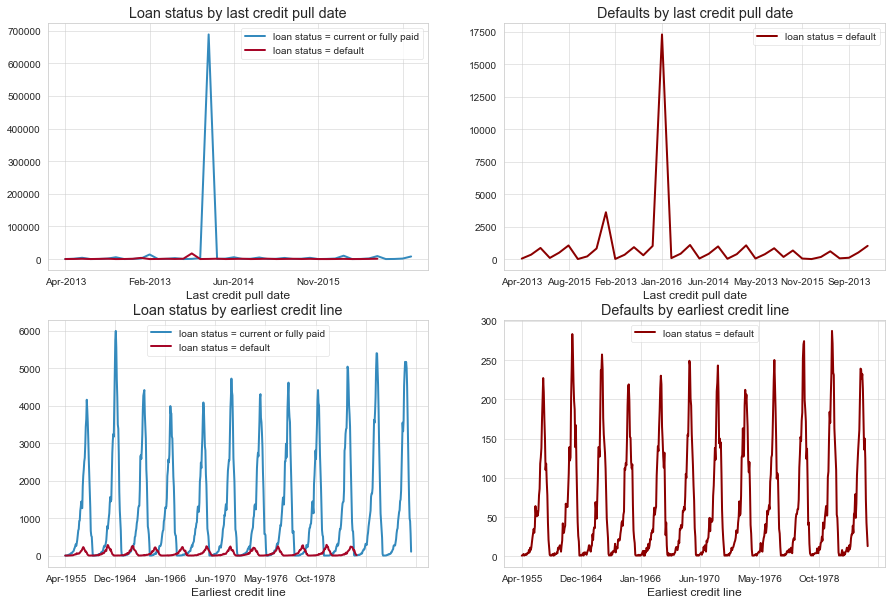

In [57]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
lc[lc['defaults'] == 0]['last_credit_pull_d'].value_counts().sort_index().plot(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['last_credit_pull_d'].value_counts().sort_index().plot(label='loan status = default')
plt.legend()
plt.xlabel('Last credit pull date')
plt.title('Loan status by last credit pull date')

plt.subplot(2,2,2)
lc[lc['defaults'] == 1]['last_credit_pull_d'].value_counts().sort_index().plot(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Last credit pull date')
plt.title('Defaults by last credit pull date')

plt.subplot(2,2,3)
lc[lc['defaults'] == 0]['earliest_cr_line'].value_counts().sort_index().plot(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['earliest_cr_line'].value_counts().sort_index().plot(label='loan status = default')
plt.legend()
plt.xlabel('Earliest credit line')
plt.title('Loan status by earliest credit line')

plt.subplot(2,2,4)
lc[lc['defaults'] == 1]['earliest_cr_line'].value_counts().sort_index().plot(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Earliest credit line')
plt.title('Defaults by earliest credit line')

### 3.6.13 mths_since_last_delinq, mths_since_last_record, mths_since_last_major_derog<a id=' mths_since_last_delinq,_mths_since_last_record,_mths_since_last_major_derog'></a>

Text(0.5, 1.0, 'Defaults by the number of months since last major derogatory')

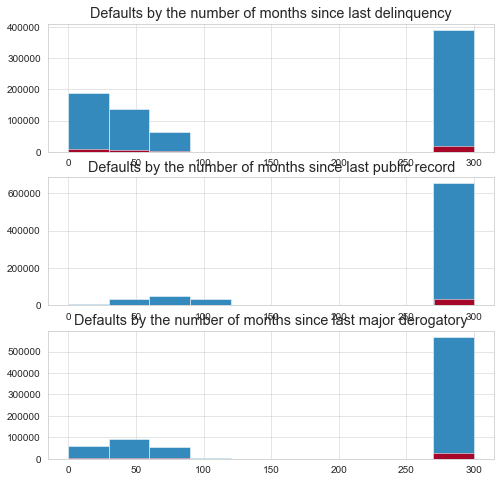

In [62]:
plt.figure(figsize=(8, 8))

plt.subplot(3,1,1)
lc[lc['defaults'] == 0]['mths_since_last_delinq'].hist(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['mths_since_last_delinq'].hist(label='loan status = default')
plt.title('Defaults by the number of months since last delinquency')

plt.subplot(3,1,2)
lc[lc['defaults'] == 0]['mths_since_last_record'].hist(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['mths_since_last_record'].hist(label='loan status = default')
plt.title('Defaults by the number of months since last public record')

plt.subplot(3,1,3)
lc[lc['defaults'] == 0]['mths_since_last_major_derog'].hist(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['mths_since_last_major_derog'].hist(label='loan status = default')
plt.title('Defaults by the number of months since last major derogatory')

## 3.7 Summary<a id='3.7_Summary'></a>

In [63]:
lc.shape

(816877, 27)

The data set has been further explored and cleaned. It is down to 27 columns, from 31, that all appear to impact whether or not a loan will default. 

In [64]:
# save the data
lc.to_csv('../data/lc_step3.csv')